# Author : Orkun Orulluoglu 

# UCB 

--EN SON RANDOM SELECTION İLE DENEMİŞTİK ŞİMDİ DE UCB İLE ZEKA KULLANRAK BUNU GELİŞTİRECEĞİ 

--ALGORİTMANIN ÖZELLİĞİ BAZI TECRÜBELERİ BİR SONRAKİ SEÇİME YANSITIYOR OLMASIDIR 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math

In [2]:
veriler = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
veriler
# these are advertisements, people click on these advertisements and every time they click on them, the advertisement is more likely to appear the next time. 
# they are increasing !!!
# this algorithm makes inferences from past experiences and does not make random choices for the future, but gives weight to some of them 
# is an algorithm!!!
# the important thing here is to earn rewards for clicks!!! we need to pay attention to this!!!
# clicks and the return rate of the reward for the clicks 


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# n : ilan sayısı 
# N : satır sayısı 

In [5]:

N=10000 # number of transactions 
d=10 # 10 ads in total 
# Ri(n)
oduller = [0] * d # it will be a list of 10 elements, each element of the list will be zero, there is no reward at the beginning. 
# Ni(n)
tiklamalar = [0] * d # clicks up to that moment 
toplam = 0 #total awards
secilenler = []
for n in range(1,N): # we simulate the click event
    add = 0 # selected advertisement
    max_ucb = 0
    for i in range(0,d): # We open a for loop again to calculate the ucb value, where we will capture the value of each ad click
        if(tiklamalar[i] > 0  ): # If the ucb value is selected for the first time, there will be no value 
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2 * math.log(n) / tiklamalar[i])
            ucb = ortalama + delta 
        else : 
            ucb = N*10
        if max_ucb < ucb: # This is the case of a big ucb out of max. 
            max_ucb = ucb
            ad = i  #  this is the advertisement that was clicked max we put the advertisement in the ad 
    secilenler.append(ad) 
    tiklamalar[ad] += 1 # if there is a click, we increase the click value by 1  
    odul = veriler.values[n,ad] # The name value in row n will be the reward for meb here 
    oduller[ad] = oduller[ad] + odul # if there is a reward, we increase the reward 
    toplam = toplam + odul   
    
    
print(" ****************** TOPLAM ÖDÜL ******************")
print(toplam)

 ****************** TOPLAM ÖDÜL ******************
2231


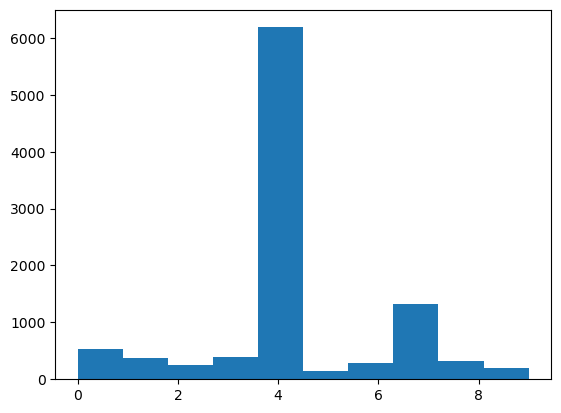

In [6]:
plt.hist(secilenler)
plt.show()
# Ad number 5(administice (ad )) is the 5th ad